Implementation of Load Forecasting(Day) using **SARIMA** model **Day Data**

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 13.7MB/s 
     |████████████████████████████████| 2.1MB 48.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20


In [ ]:
import csv
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pmdarima
import random
import seaborn as sns
import statsmodels.tsa.stattools as ts
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving load.csv to load.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['load.csv']))

In [ ]:
train=df.head(700)
test=df[700:]

In [ ]:
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=7, seasonal=True, trace=True, d=0, D=1, error_action='warn', suppress_warnings=True, random_state =1 , n_fits=1)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=17842.738, BIC=17851.821, Time=0.047 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=17509.066, BIC=17527.230, Time=0.577 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=17541.276, BIC=17559.440, Time=0.539 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=17840.812, BIC=17845.353, Time=0.045 seconds
Fit ARIMA(1,0,0)x(0,1,0,7) [intercept=True]; AIC=17653.351, BIC=17666.974, Time=0.127 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=17468.829, BIC=17491.534, Time=1.391 seconds
Fit ARIMA(1,0,0)x(3,1,0,7) [intercept=True]; AIC=17438.980, BIC=17466.226, Time=2.775 seconds
Fit ARIMA(1,0,0)x(4,1,0,7) [intercept=True]; AIC=17437.586, BIC=17469.373, Time=4.256 seconds
Fit ARIMA(1,0,0)x(5,1,0,7) [intercept=True]; AIC=17434.466, BIC=17470.794, Time=8.752 seconds
Fit ARIMA(1,0,0)x(6,1,0,7) [intercept=True]; AIC=17436.163, BIC=17477.032, Time=11.606 seconds
Fit ARIMA(1,0,0

In [ ]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  700
Model:             SARIMAX(6, 0, 3)x(1, 1, 3, 7)   Log Likelihood               -8649.006
Date:                           Fri, 03 Jul 2020   AIC                          17328.012
Time:                                   04:55:21   BIC                          17396.128
Sample:                                        0   HQIC                         17354.355
                                           - 700                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    730.8086    551.575      1.325      0.185    -350.258    1811.876
ar.L1         -0.2179      0.056     -3.897      0.000      -0.327      -0.108
ar.L2          0.8696      0.058     15.041      0.000       0.756       0.983
ar.L3          0.5919      0.064      9.205      0.000       0.466       0.718
ar.L4         -0.4635      0.052     -8.952      0.000      -0.565      -0.362
ar.L5          0.0519      0.052      0.995      0.320      -0.050       0.154
ar.L6          0.1248      0.048      2.584      0.010       0.030       0.219
ma.L1          0.7688      0.044     17.319      0.000       0.682       0.856
ma.L2         -0.4179      0.056     -7.471      0.000      -0.528      -0.308
ma.L3         -0.8023      0.041    -19.341      0.000      -0.884      -0.721
ar.S.L7       -0.9607      0.044    -21.714      0.000      -1.047      -0.874
ma.S.L7        0.1543      0.057      2.713      0.007       0.043       0.266
ma.S.L14      -0.8457      0.057    -14.946      0.000      -0.957      -0.735
ma.S.L21      -0.0958      0.044     -2.196      0.028      -0.181      -0.010
sigma2      4.929e+09      0.001   6.37e+12      0.000    4.93e+09    4.93e+09
===================================================================================
Ljung-Box (Q):                       41.19   Jarque-Bera (JB):               923.53
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -1.21
Prob(H) (two-sided):                  0.70   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+27. Standard errors may be unstable.
"""

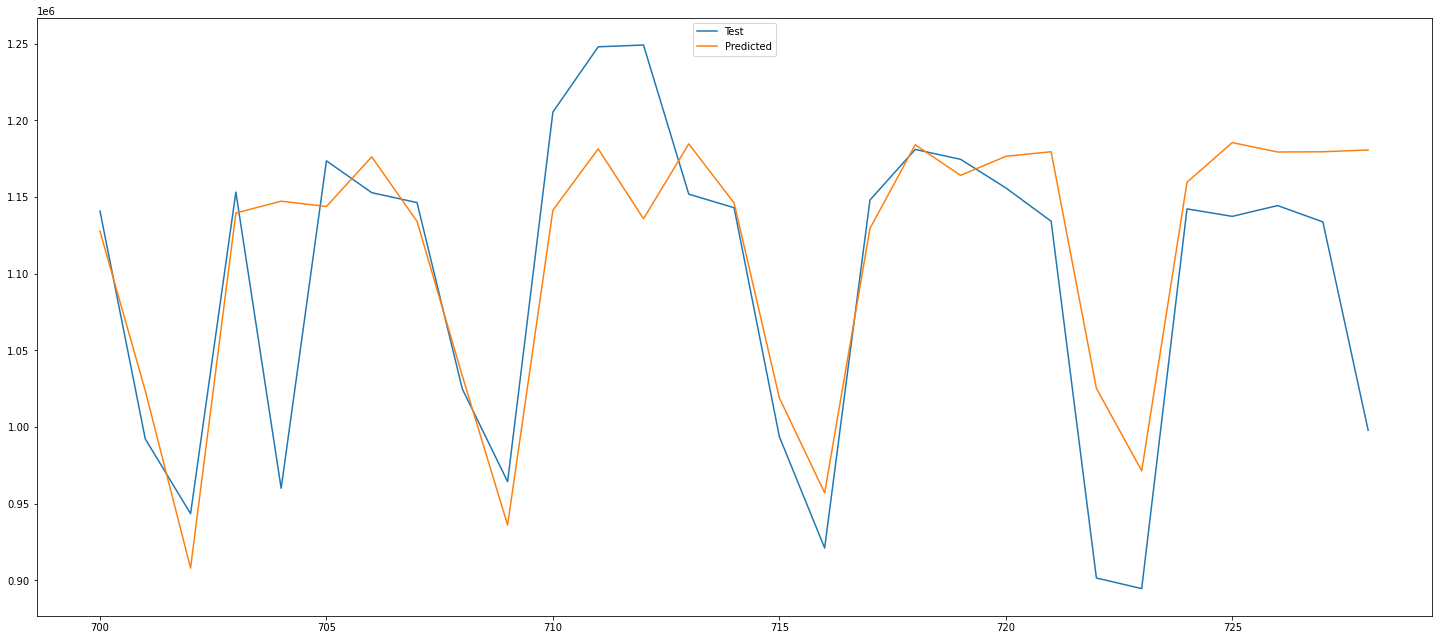

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=29), index=test.index)
prediction.columns = ['Predicted_Temperature']
plt.figure(figsize=(25,11))
#<Figure size 1500x1000 with 0 Axes>
#plt.plot(train, label='Training')
#[<matplotlib.lines.Line2D object at 0x7fbd668fa908>]
plt.plot(test, label='Test')
#[<matplotlib.lines.Line2D object at 0x7fbd6e8871d0>]
plt.plot(prediction, label='Predicted')
#[<matplotlib.lines.Line2D object at 0x7fbd6e87a5c0>]
plt.legend(loc = 'upper center')
#<matplotlib.legend.Legend object at 0x7fbd6e887320>
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape=mean_absolute_percentage_error(test, prediction)

In [ ]:
mape

4.465739374183136